# Training the ML Model for Forecasting Fuel Load in Mid-Latitudes
This notebooks demonstrates training a CatBoost model with hyperparameter optimization, followed by feature importance visualization using SHAP. CatBoost is a machine learning algorithm that uses gradient boosting on decision trees. This notebook utilizes the `deepfuel-ML/src/models/catboost_module.py` script for model training.

In [1]:
import os
import pandas as pd
import numpy as np
from joblib import dump, load
import shap

### Data directory

In [2]:
# The training, validation and test set required for model training are placed in data/midlats/
! tree ../data/midlats

../data/midlats
├── midlats_test.csv
├── midlats_train.csv
├── midlats_val.csv
└── results
    ├── midlats_output_Aug.csv
    ├── midlats_output_Dec.csv
    ├── midlats_output_July.csv
    ├── midlats_output_Nov.csv
    ├── midlats_output_Oct.csv
    └── midlats_output_Sept.csv

1 directory, 9 files


### Input Features

- Latitude
- Longitude
- Leaf Area Index
- Fire Weather Index: fwinx
- Drought Code: drtcode
- Fire Danegr Severity Rating: fdsrte
- Fraction of Burnable Area: fraction_of_burnable_area
- d2m
- Evaporation Rate: erate
- fg10
- si10
- Volumetric Soil Water Level 1: swvl1
- 2m Temperature: t2m
- tprate
- Climatic Region: climatic_region
- Slope: slor
- Month: month
- Fuel Load: actual_load (target variable)

In [3]:
# Check header of training set matches input features
! head -n 1 ../data/midlats/midlats_train.csv

latitude,longitude,fwinx,drtcode,fdsrte,LAI,fraction_of_burnable_area,d2m,erate,fg10,si10,swvl1,t2m,tprate,climatic_region,slor,actual_load,month


### Model Training

In [4]:
!python '../src/train.py'  --model_name 'CatBoost' --data_path '../data/midlats/' --exp_name 'CatBoost_exp'

Link for the created Neptune experiment--------
https://ui.neptune.ai/shared/step-by-step-monitoring-experiments-live/e/STEP-499
---------------------------------------
0:	learn: 0.9212928	test: 0.9386610	best: 0.9386610 (0)	total: 388ms	remaining: 6m 27s
1:	learn: 0.8598003	test: 0.8904860	best: 0.8904860 (1)	total: 574ms	remaining: 4m 46s
2:	learn: 0.8098807	test: 0.8434479	best: 0.8434479 (2)	total: 896ms	remaining: 4m 57s
3:	learn: 0.7723626	test: 0.8051585	best: 0.8051585 (3)	total: 1.16s	remaining: 4m 49s
4:	learn: 0.7437941	test: 0.7805365	best: 0.7805365 (4)	total: 1.35s	remaining: 4m 29s
5:	learn: 0.7177903	test: 0.7501363	best: 0.7501363 (5)	total: 1.66s	remaining: 4m 35s
6:	learn: 0.6993091	test: 0.7334989	best: 0.7334989 (6)	total: 1.9s	remaining: 4m 29s
7:	learn: 0.6851052	test: 0.7166964	best: 0.7166964 (7)	total: 2.07s	remaining: 4m 17s
8:	learn: 0.6738225	test: 0.7038390	best: 0.7038390 (8)	total: 2.22s	remaining: 4m 4s
9:	learn: 0.6641794	test: 0.6970817	best: 0.697081

91:	learn: 0.5485934	test: 0.6302374	best: 0.6302374 (91)	total: 11.5s	remaining: 1m 53s
92:	learn: 0.5478601	test: 0.6301566	best: 0.6301566 (92)	total: 11.6s	remaining: 1m 53s
93:	learn: 0.5472225	test: 0.6301963	best: 0.6301566 (92)	total: 11.8s	remaining: 1m 53s
94:	learn: 0.5464797	test: 0.6293306	best: 0.6293306 (94)	total: 11.9s	remaining: 1m 53s
95:	learn: 0.5461023	test: 0.6291351	best: 0.6291351 (95)	total: 12s	remaining: 1m 52s
96:	learn: 0.5451039	test: 0.6284536	best: 0.6284536 (96)	total: 12s	remaining: 1m 51s
97:	learn: 0.5443578	test: 0.6280951	best: 0.6280951 (97)	total: 12s	remaining: 1m 50s
98:	learn: 0.5437925	test: 0.6277348	best: 0.6277348 (98)	total: 12.2s	remaining: 1m 51s
99:	learn: 0.5430507	test: 0.6281249	best: 0.6277348 (98)	total: 12.3s	remaining: 1m 50s
100:	learn: 0.5427353	test: 0.6278336	best: 0.6277348 (98)	total: 12.5s	remaining: 1m 51s
101:	learn: 0.5420918	test: 0.6277949	best: 0.6277348 (98)	total: 12.6s	remaining: 1m 51s
102:	learn: 0.5415191	tes

The training logs can be viewed live online at the following link: https://ui.neptune.ai/shared/step-by-step-monitoring-experiments-live/e/STEP-158

### Loading the trained model

In [5]:
model = load('../src/pre-trained_models/CatBoost.joblib')

### Feature importance using SHAP
[SHAP](https://github.com/slundberg/shap) (SHapley Additive exPlanations) is used to explain the output of the trained machine learning model.

In [6]:
midlat_train = pd.read_csv('../data/midlats/midlats_train.csv')

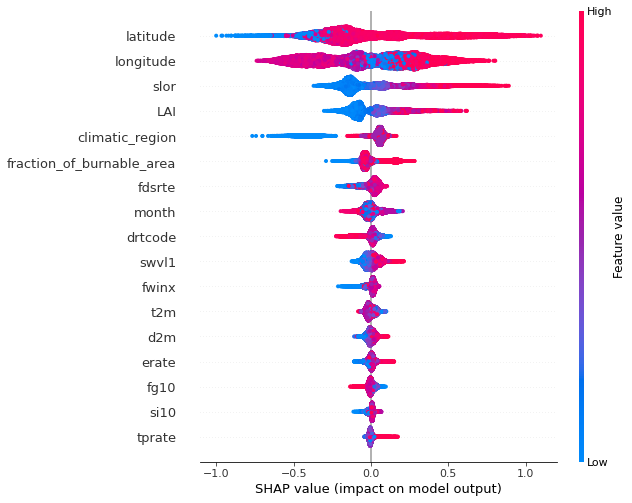

In [7]:
shap_values = shap.TreeExplainer(model).shap_values(midlat_train.drop([ 'actual_load'], axis=1))
shap.summary_plot(shap_values, midlat_train.drop(['actual_load'], axis=1))

The y-axis indicates the variable name, in order of importance from top to bottom.
On the x-axis (Impact on model output), the horizontal location shows whether the effect of that value is associated with a higher or lower prediction. Gradient colour indicates feature value.